In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('Arvand.xlsx')

In [ ]:
df.info()

In [ ]:
df_1 = df.rename(columns={
    'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)': 'Залог',
    'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)':'Уровень клиента',
    'Этап кредитования (который раз получает кредит ':'Этап кредитования'
})                

In [322]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   KOD                                             85422 non-null  int64         
 1   Birthday                                        85241 non-null  object        
 2   Year                                            36221 non-null  float64       
 3   Married                                         85422 non-null  object        
 4   Gender                                          85422 non-null  object        
 5   Nationality                                     85422 non-null  object        
 6   Educ                                            85422 non-null  object        
 7   FamilySize                                      85075 non-null  object        
 8   BusExper                                      

In [ ]:
df_2 = df_1.drop([
    'KOD',
    'Year',
    'Дата окончания по графику',
    'Ежемесячная сумма погашения по графику',
    'Льготный период (месяц)',
], axis=1)

In [ ]:
df_2.info()

## Кодировка и чистка

In [325]:
gen_dict = {'Мужской':0,'Женский':1}

In [326]:
df_2['Gender'] = df['Gender'].map(gen_dict)
df_2['Gender'].value_counts()

Gender
0    50542
1    34880
Name: count, dtype: int64

In [327]:
df_2['Nationality'].unique()

array(['Точик', 'Узбек', 'Киргиз', 'Рус', 'Тотор', 'Другие', 'Украин',
       'Карис', 'Карачои'], dtype=object)

In [328]:
df_2['Educ'].unique()

array(['Миёна', 'Миёнаи махсус', 'Оли', 'Олии нопурра', 'Миёнаи нопурра',
       'Аспирантура'], dtype=object)

### FamilySize

In [329]:
df_2['FamilySize'].unique()

array([4, 6, 5, 3, 7, 2, 'Нет инфо', 1, 8, nan], dtype=object)

In [330]:
df_2['FamilySize'].mode()

0    3
Name: FamilySize, dtype: object

In [331]:
df_2['FamilySize'] = df['FamilySize'].replace({'Нет инфо':3,})
df_2['FamilySize'] = df_2['FamilySize'].fillna(3)
df_2['FamilySize'] = df_2['FamilySize'].astype(int)

### BusExper

In [332]:
mode_value = df_2['BusExper'].mode()[0]
mode_value

1

In [333]:
df_2['BusExper'].unique()

array([5, nan, 1, 10, 15, 12, 11, 3, 19, 6, 8, 2, 18, 20, 30, 28, 25, 4,
       22, 26, 7, 23, 13, 16, 9, 40, 17, 34, 0, 14, 27, 50, 33, 29, 32,
       35, 44, '20+', 31, 38, 21, 49, 24, 42, 47, 45, 36, 39, '6мес',
       '6-мох', 46, 43, 1.5, 37, '1мох', 41, 2.5, 3.5, '4-мох', '8-мох',
       0.6, '6мох', 4.5, 48, '5 мох', '7-мох', 1.6, 0.8, 0.4, 0.7, 2.4,
       1.4, ',', 73, 215, 141, 'мир', 'ъолия', 123, 113, '4ё', 6.5, 100,
       1.1, 2.7, 1.3, '0.5', 2.3, 1.7, 0.5, 4.6, 75, 521, 60],
      dtype=object)

In [334]:
df_2['BusExper'] = df_2['BusExper'].replace({
    '6мес': 0.5,
    '6-мох': 0.5,
    '6мох':0.5,
    '5 мох':0.5,
    '0.5': 0.5,
    '20+': 1.5,
    '4-мох': 0.3,
    '1мох': 0.12,
    '8-мох': 0.6,
    '7-мох': 0.55,
    ',': mode_value,
    73: mode_value,
    215: mode_value,
    141: mode_value,
    'мир': mode_value,
    'ъолия': mode_value,
    123: mode_value,
    113: mode_value,
    '4ё': mode_value,
    100: mode_value,
    75: mode_value,
    521: mode_value,
    60: mode_value,
})
df_2['BusExper'] = df_2['BusExper'].fillna(mode_value)

In [335]:
df_2['BusExper'].unique()

array([ 5.  ,  1.  , 10.  , 15.  , 12.  , 11.  ,  3.  , 19.  ,  6.  ,
        8.  ,  2.  , 18.  , 20.  , 30.  , 28.  , 25.  ,  4.  , 22.  ,
       26.  ,  7.  , 23.  , 13.  , 16.  ,  9.  , 40.  , 17.  , 34.  ,
        0.  , 14.  , 27.  , 50.  , 33.  , 29.  , 32.  , 35.  , 44.  ,
        1.5 , 31.  , 38.  , 21.  , 49.  , 24.  , 42.  , 47.  , 45.  ,
       36.  , 39.  ,  0.5 , 46.  , 43.  , 37.  ,  0.12, 41.  ,  2.5 ,
        3.5 ,  0.3 ,  0.6 ,  4.5 , 48.  ,  0.55,  1.6 ,  0.8 ,  0.4 ,
        0.7 ,  2.4 ,  1.4 ,  6.5 ,  1.1 ,  2.7 ,  1.3 ,  2.3 ,  1.7 ,
        4.6 ])

In [336]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Birthday                                        85241 non-null  object        
 1   Married                                         85422 non-null  object        
 2   Gender                                          85422 non-null  int64         
 3   Nationality                                     85422 non-null  object        
 4   Educ                                            85422 non-null  object        
 5   FamilySize                                      85422 non-null  int32         
 6   BusExper                                        85422 non-null  float64       
 7   Filial                                          85422 non-null  object        
 8   Region                                        

In [337]:
df_2['Region'].unique()

array(['Ашт', 'Кистакуз', 'Худжанд-Панчшанбе', 'Худжанд-Центр', 'Ифтихор',
       'Оббурдон', 'Бустон', 'Мархамат', 'Сомгор', 'Шарк', 'Дусти',
       'Пунук', 'Уяс', 'Оппон', 'Конибодом', 'Кулканд', 'Ниёзбек',
       'Исфара', 'Каракчикум', 'Ворух', 'Мехнатобод', 'Ободи',
       'Калининобод', 'Шахристон', 'Зафаробод', 'Чашмасор', 'Истаравшан',
       'Х.Алиев', 'Равшан', 'Истаравшан-филиал', 'Гончи', 'Нофароч',
       'Ничони', 'Навкент', 'Некфайз', 'Гули сурх', 'Мучун', 'Душанбе',
       'Турсунзода', 'Вахдат', 'Хисор', 'Сино', 'Рогун', 'Файзобод',
       'Рудаки', 'Спитамен', 'Дж.Расулов', 'Гулякандоз', 'Куруш',
       'Панчакент', 'Ёри', 'Саразм', 'Гусар'], dtype=object)

In [338]:
df_2['Уровень клиента'].unique()

array(['Бовари', 'VIP', 'Хамкори', 'Шарик'], dtype=object)

In [339]:
df_2['Навпреление деятельности'].unique()

array(['Чорводори ва коркарди шир', 'Приобретение техники', 'Савдо',
       'Приобретение мебели', 'Ремонт дома', 'Хидматрасони',
       'Оплата на лечение', 'Кишту кор', 'Истехсолот',
       'Проведение мероприятий', 'Оплата поездок',
       'Переоборудование транспорта', 'Покупка квартиры', 'Коркарди шир',
       'Оплата образования', 'Ремонт места деятельности', 'Все',
       'Потребнужды', 'Кишоварзи', 'Животноводство', 'Мевахушккуни',
       'Коммерческий', 'Потреб.другое', 'Сушка фрутов'], dtype=object)

In [340]:
df_2['Продукт'].unique()

array(['Кредит на предпринимательскую деятельность',
       'Потребительский кредит', 'Жилищный кредит',
       'Энергосберегающие технологии', nan], dtype=object)

In [341]:
df_2['Валюта кредита'].unique()

array(['Сомони', 'Доллар США', 'Рос.рубль'], dtype=object)

In [342]:
df_2['Залог'].unique()

array(['Категория 4', 'Категория 3', 'Группа', 'Категория 1',
       'Категория 2'], dtype=object)

#### df_3

In [343]:
df_3 = df_2.copy()
df_3 = df_3.dropna()

In [344]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79381 entries, 0 to 85421
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Birthday                                        79381 non-null  object        
 1   Married                                         79381 non-null  object        
 2   Gender                                          79381 non-null  int64         
 3   Nationality                                     79381 non-null  object        
 4   Educ                                            79381 non-null  object        
 5   FamilySize                                      79381 non-null  int32         
 6   BusExper                                        79381 non-null  float64       
 7   Filial                                          79381 non-null  object        
 8   Region                                          793

In [345]:
df_3['Birthday'] = df['Birthday'].astype(str)
df_3['Дата выдачи'] = df['Дата выдачи'].astype(str)

In [346]:
for i in df_3['Birthday']:
    if i[2]=='.':
        print(i)

11.11.1678
10.09.1652
11.11.1678
11.11.1678
11.11.1678
13.11.0985
21.03.0178
10.04.1655
12.09.1278


In [347]:
df_3 = df_3.drop(df_3[df_3['Birthday'].str[2]=='.'].index)

In [348]:
df_3 = df_3.drop(df_3[df_3['Birthday']=='nan'].index)

In [349]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79372 entries, 0 to 85421
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birthday                                        79372 non-null  object 
 1   Married                                         79372 non-null  object 
 2   Gender                                          79372 non-null  int64  
 3   Nationality                                     79372 non-null  object 
 4   Educ                                            79372 non-null  object 
 5   FamilySize                                      79372 non-null  int32  
 6   BusExper                                        79372 non-null  float64
 7   Filial                                          79372 non-null  object 
 8   Region                                          79372 non-null  object 
 9   Уровень клиента                             

In [350]:
age_list = [] 
for i,j in zip(df_3['Birthday'], df_3['Дата выдачи']):
    age = int(j[:4])-int(i[:4])
    if int(j[5:7])==int(i[5:7]):
        if int(j[8:10])<int(i[8:10]):
            age-=1
    elif int(j[5:7])<int(i[5:7]):
        age-=1
    age_list.append(age)

In [351]:
df_3['Age'] = age_list

In [352]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79372 entries, 0 to 85421
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birthday                                        79372 non-null  object 
 1   Married                                         79372 non-null  object 
 2   Gender                                          79372 non-null  int64  
 3   Nationality                                     79372 non-null  object 
 4   Educ                                            79372 non-null  object 
 5   FamilySize                                      79372 non-null  int32  
 6   BusExper                                        79372 non-null  float64
 7   Filial                                          79372 non-null  object 
 8   Region                                          79372 non-null  object 
 9   Уровень клиента                             

In [353]:
df_3[['Birthday','Дата выдачи','Age']]

,Birthday,Дата выдачи,Age
0,1989-03-13 00:00:00,2014-12-12,25
1,1963-02-12 00:00:00,2014-01-15,50
2,1969-01-12 00:00:00,2014-01-03,44
3,1973-09-17 00:00:00,2014-01-01,40
4,1973-03-31 00:00:00,2014-01-03,40
...,...,...,...
85417,1963-01-12 00:00:00,2015-12-22,52
85418,1987-09-01 00:00:00,2015-12-22,28
85419,1976-03-10 00:00:00,2015-12-23,39
85420,1984-03-05 00:00:00,2015-12-23,31


In [354]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79372 entries, 0 to 85421
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birthday                                        79372 non-null  object 
 1   Married                                         79372 non-null  object 
 2   Gender                                          79372 non-null  int64  
 3   Nationality                                     79372 non-null  object 
 4   Educ                                            79372 non-null  object 
 5   FamilySize                                      79372 non-null  int32  
 6   BusExper                                        79372 non-null  float64
 7   Filial                                          79372 non-null  object 
 8   Region                                          79372 non-null  object 
 9   Уровень клиента                             

# EDA

Постановка гипотез:
1) Существует зависимость между возрастом заемщика (Age) и количеством просрочек (Дни прочрочек) - Чем страше клиент, тем меньше у него просроченных дней
2) Чистая прибыль (Чистая прибыль) связана с кредитным риском. Чем больше больше доход клиента, тем меньше кол-во просроченных дней
3) Чем выше статус клиента, тем меньше у него просрочек
4) Уровень образования (Educ) влияет на количество просрочек, чем вышк уровень образования, тем больще Валовый доход и тем меньше кол-во просрочек
5) Стаж работы (BusExper) влияет на вероятность просрочек. Между колонками "Busex" (опыт работы) и  "Валовая прибыль"  должна быть корреляция
6) Регион проживания (Region) влияет на риск просрочек.
7) Семейное положение (Married) связано с количеством просрочек.
8) Размер семьи (FamilySize) влияет на кредитный риск.
9) Величина залога (Залог) влияет на риск просрочек
10) Срок кредита (Срок кредита) влияет на количество просрочек.
11) Пол заемщика (Gender) влияет на вероятность просрочек.

## Изучение Таргета 

<Axes: >

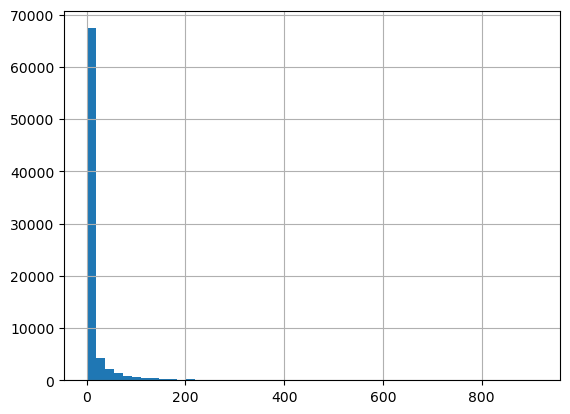

In [355]:
df_3['Дни просрочки'].hist(bins=50)

In [356]:
df_3['Target'] = df_3['Дни просрочки'].apply(lambda x:1 if x<=30 else 0)

In [357]:
counts = df_3['Target'].value_counts(normalize=True).reset_index()
counts.columns = ['Target', 'percentage']
counts['percentage'] *= 100

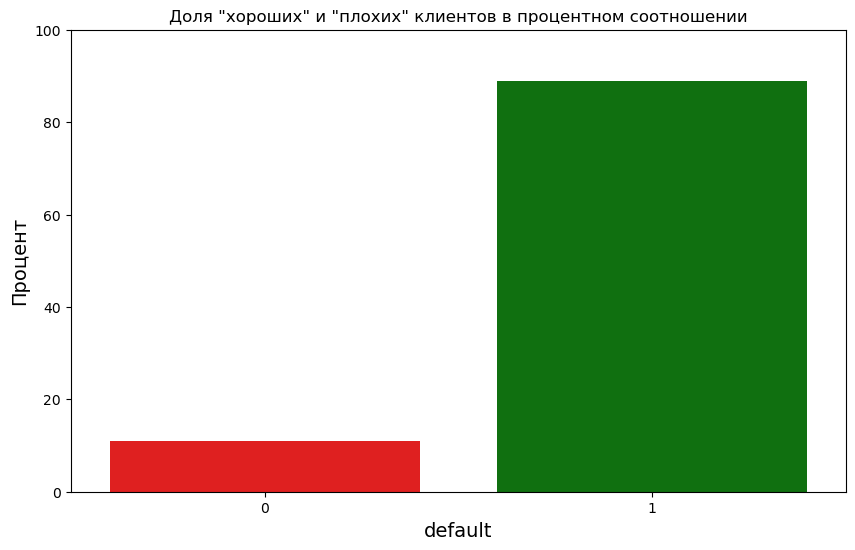

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
sns.barplot(x='Target', y='percentage', data=counts, palette=['red', 'green'])
plt.title('Доля "хороших" и "плохих" клиентов в процентном соотношении')
plt.xlabel('default', fontsize = 14)
plt.ylabel('Процент', fontsize = 14)
plt.ylim(0, 100)
plt.show()


In [359]:
counts

,Target,percentage
0,1,88.921786
1,0,11.078214


В таргетовой колонке у нас присутствует дизбаланс

## Hypothesis №1

Существует зависимость между возрастом заемщика (Age) и количеством просрочек (Дни прочрочек) - Чем страше клиент, тем меньше у него просроченных дней

<Axes: >

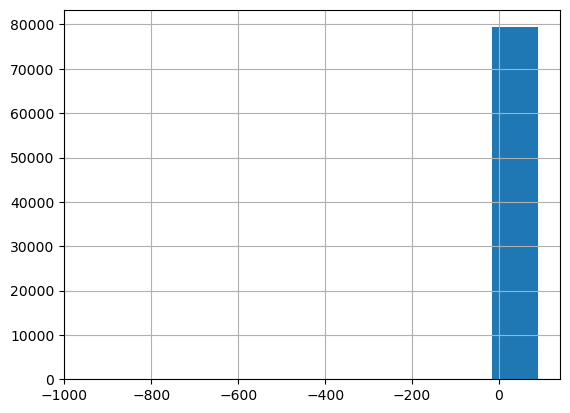

In [360]:
df_3['Age'].hist()

In [361]:
df_3 = df_3.drop(df_3[df_3['Age']<18].index)

<Axes: >

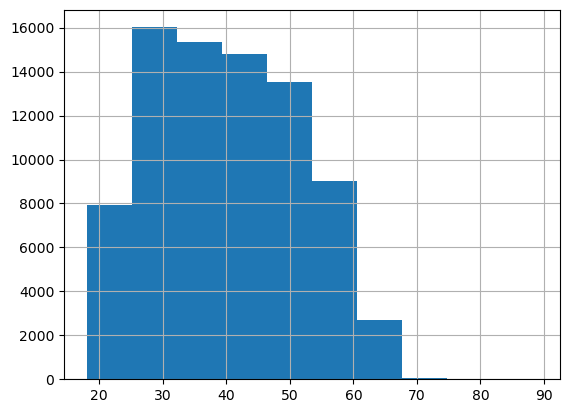

In [362]:
df_3['Age'].hist()

In [363]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79364 entries, 0 to 85421
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birthday                                        79364 non-null  object 
 1   Married                                         79364 non-null  object 
 2   Gender                                          79364 non-null  int64  
 3   Nationality                                     79364 non-null  object 
 4   Educ                                            79364 non-null  object 
 5   FamilySize                                      79364 non-null  int32  
 6   BusExper                                        79364 non-null  float64
 7   Filial                                          79364 non-null  object 
 8   Region                                          79364 non-null  object 
 9   Уровень клиента                             

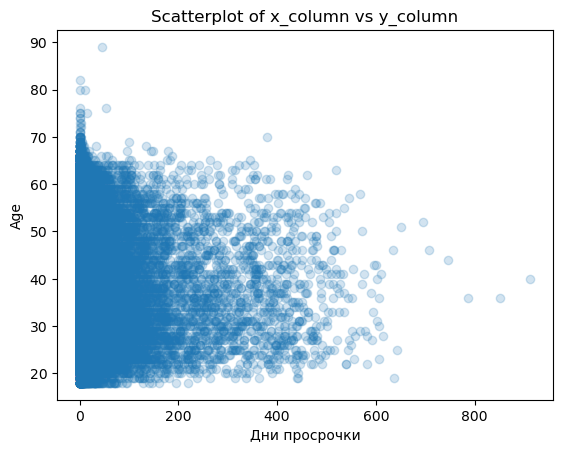

In [364]:
plt.scatter(x='Дни просрочки', y='Age',alpha=0.2, data=df_3)
plt.title('Scatterplot of x_column vs y_column')
plt.xlabel('Дни просрочки')
plt.ylabel('Age')
plt.show()

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(2.2233576388888867, 0.5, 'Density')

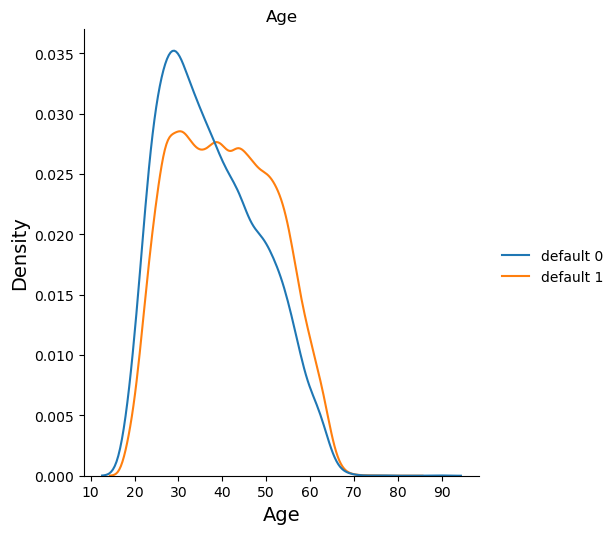

In [365]:
sns.displot(
    {'default 0':df_3[df_3['Target']==0].Age,
     'default 1':df_3[df_3['Target']==1].Age
    },
    kind='kde',
    common_norm = False
)
plt.title('Age')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

In [366]:
df_3.groupby('Target')['Age'].median()

Target
0    36.0
1    40.0
Name: Age, dtype: float64

In [367]:
df_3.groupby('Target')['Age'].mean()

Target
0    37.569544
1    40.561080
Name: Age, dtype: float64

In [368]:
df_3.groupby('Target')['Age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,Target,Age
0,0,29
1,1,31


Гипотеза частичтно подтвердилась

In [369]:
default_1 = df_3[df_3['Target']==1]['Age']
default_0 = df_3[df_3['Target']==0]['Age']

In [370]:
import scipy.stats as sc
t_stat, p_value = sc.ttest_ind(default_1, default_0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 23.82028476600772, P-value: 2.2031868110220826e-122


## Hypothesis №2

Чистая прибыль связана с кредитным риском. Чем больше больше доход клиента, тем меньше кол-во просроченных дней

In [371]:
df_3[df_3['Валовая прибыль']<=0][['Сумма кредита','Валовая прибыль', 'Чистая прибыль','Залог']]

,Сумма кредита,Валовая прибыль,Чистая прибыль,Залог
4,20000.0,0.0,1710.0,Категория 1
6,5000.0,0.0,310.0,Категория 3
13,2300.0,0.0,435.0,Категория 2
17,1000.0,0.0,255.0,Группа
21,2500.0,0.0,1290.0,Группа
...,...,...,...,...
85413,3500.0,0.0,660.0,Категория 2
85414,1500.0,0.0,480.0,Категория 2
85417,500.0,0.0,160.0,Категория 2
85418,1100.0,0.0,359.0,Категория 2


In [372]:
df_3[['Валовая прибыль', 'Чистая прибыль']].describe()

,Валовая прибыль,Чистая прибыль
count,7.936400e+04,79364.000000
mean,1.860154e+03,2078.856534
std,1.022125e+04,5703.273900
min,-7.400000e+04,-70150.000000
25%,0.000000e+00,560.000000
50%,0.000000e+00,1050.000000
75%,1.535000e+03,1864.000000
max,2.011996e+06,595504.000000


Убираем колонку "Валовая прибыль" так как там имеется много выбросов и нулевых данных.
Проверять гипотезу будем по колонке Чистая прибыль.

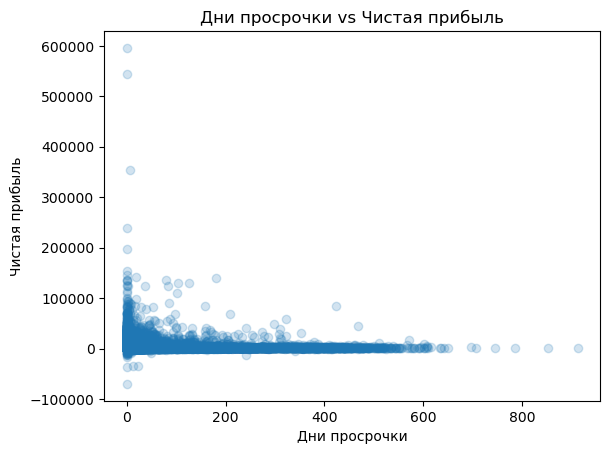

In [373]:
plt.scatter(x='Дни просрочки', y='Чистая прибыль',alpha=0.2, data=df_3)
plt.title('Дни просрочки vs Чистая прибыль')
plt.xlabel('Дни просрочки')
plt.ylabel('Чистая прибыль')
plt.show()

In [374]:
df_3 = df_3.drop(df_3[df_3['Чистая прибыль']<=100].index)

In [375]:
df_3 = df_3.drop(df_3[df_3['Чистая прибыль']>100000].index)

In [376]:
df_3['Чистая прибыль'].describe()

count    76332.000000
mean      2109.894974
std       4264.280692
min        101.000000
25%        612.000000
50%       1092.500000
75%       1910.000000
max      98250.000000
Name: Чистая прибыль, dtype: float64

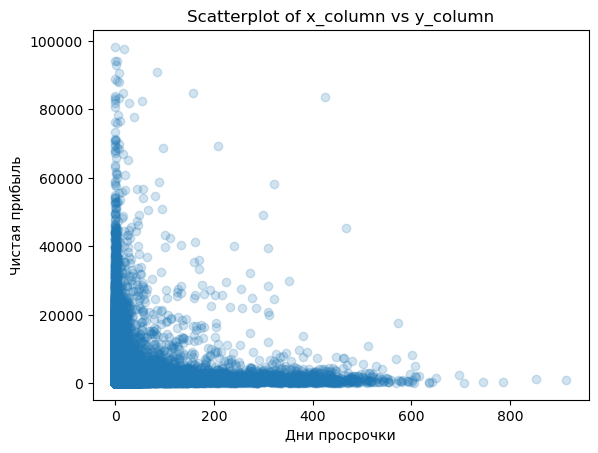

In [377]:
plt.scatter(x='Дни просрочки', y='Чистая прибыль',alpha=0.2, data=df_3)
plt.title('Scatterplot of x_column vs y_column')
plt.xlabel('Дни просрочки')
plt.ylabel('Чистая прибыль')
plt.show()

### Income

In [378]:
df_3 = df_3.rename(columns={'Чистая прибыль': 'Income'})          

In [379]:
df_3_1 = df_3.copy()
df_3_1 = df_3_1.drop(df_3_1[df_3_1['Income']>14000].index)

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-6.651642361111113, 0.5, 'Density')

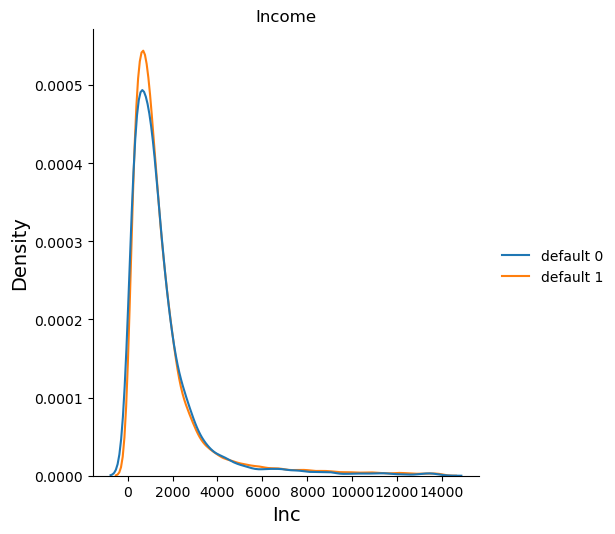

In [380]:
sns.displot(
    {'default 0':df_3_1[df_3_1['Target']==0].Income,
             'default 1':df_3_1[df_3_1['Target']==1].Income
    },
    kind='kde',
    common_norm = False
)
plt.title('Income')
plt.xlabel('Inc', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

In [381]:
df_3_1 = df_3.copy()
df_3_1 = df_3_1.drop(df_3_1[df_3_1['Income']>6000].index)

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-6.651642361111113, 0.5, 'Density')

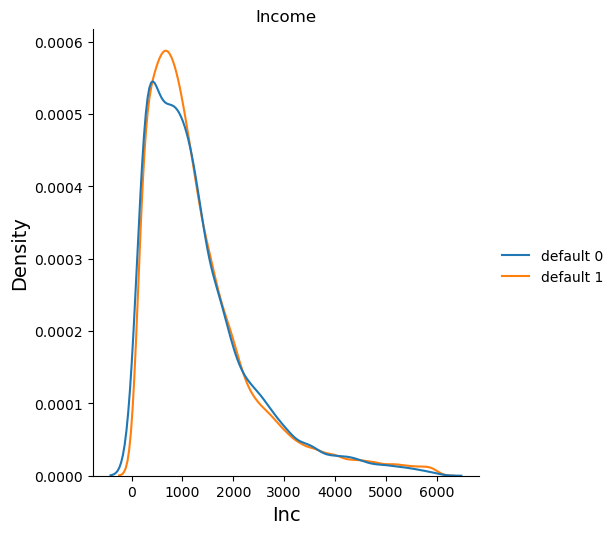

In [382]:
sns.displot(
    {'default 0':df_3_1[df_3_1['Target']==0].Income,
             'default 1':df_3_1[df_3_1['Target']==1].Income
    },
    kind='kde',
    common_norm = False
)
plt.title('Income')
plt.xlabel('Inc', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

In [383]:
df_3.groupby('Target')['Income'].mean()

Target
0    2080.647585
1    2113.554131
Name: Income, dtype: float64

In [384]:
df_3.groupby('Target')['Income'].median()

Target
0    1085.0
1    1095.0
Name: Income, dtype: float64

In [385]:
df_3.groupby('Target')['Income'].apply(lambda x: x.value_counts().index[0]).reset_index()

,Target,Income
0,0,1200.0
1,1,700.0


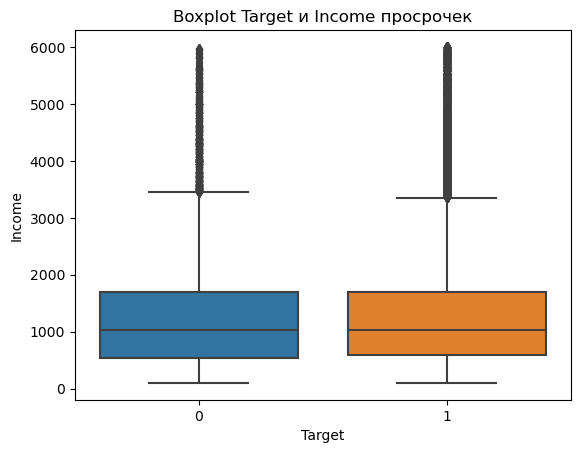

In [386]:
sns.boxplot(x='Target', y='Income', data=df_3_1)
plt.title('Boxplot Target и Income просрочек')
plt.show()

In [387]:
default_1 = df_3[df_3['Target']==1]['Income']
default_0 = df_3[df_3['Target']==0]['Income']

### T - test, D'Agostino-test, Mann Whitney-test

#### T-test

In [388]:
import scipy.stats as sc
t_stat, p_value = sc.ttest_ind(default_1, default_0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.6186609093197627, P-value: 0.5361534622676696


#### D'Agostino-test

In [389]:
stat, p_value = sc.normaltest(df_3['Income'])
print(f'Statistic: {stat}, P-value: {p_value}')
if p_value > 0.05:
    print("Распределение нормальное (не отвергаем H0)")
else:
    print("Распределение не нормальное (отвергаем H0)")

Statistic: 105693.9791203032, P-value: 0.0
Распределение не нормальное (отвергаем H0)


#### Whitney-test

In [390]:
u_stat, p_value = sc.mannwhitneyu(default_1, default_0, alternative='greater')  
print(f"U-statistic: {u_stat}, P-value: {p_value}")
if p_value > 0.05:
    print("Разница между выборками не имеется (H0)")
else:
    print("Между выборками определенно имеется разница(H1)")

U-statistic: 295494654.0, P-value: 3.8673192340674916e-05
Между выборками определенно имеется разница(H1)


## Hypothesis №3

Уровень клиента имеет влияет на Кол-во просрочек ('Target') - Чем выше статус клиента, тем меньше у него просрочек

In [391]:
df_3['Уровень клиента'].unique()

array(['Бовари', 'VIP', 'Хамкори', 'Шарик'], dtype=object)

### Boxplot по Статусу клиента

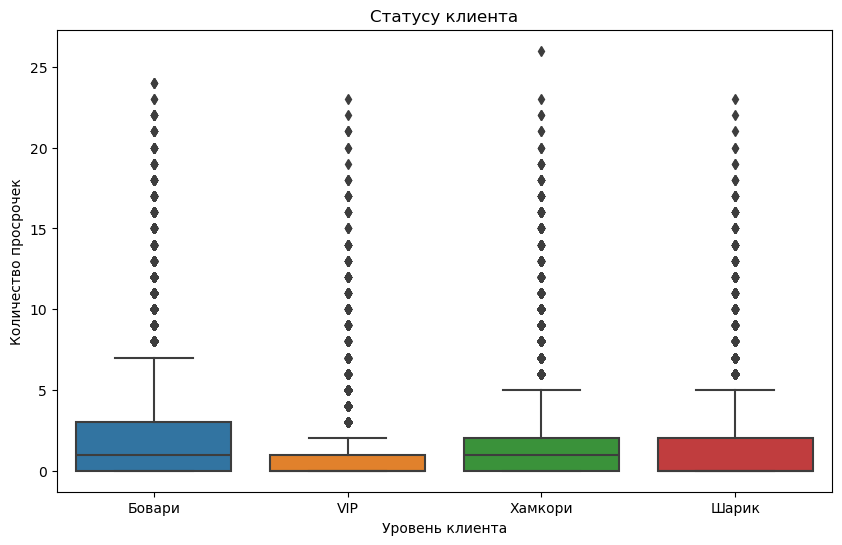

In [392]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Уровень клиента', y='Количество просрочек', data=df_3)
plt.title('Статусу клиента')
plt.show()

### Barplot по статусу клиентов

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

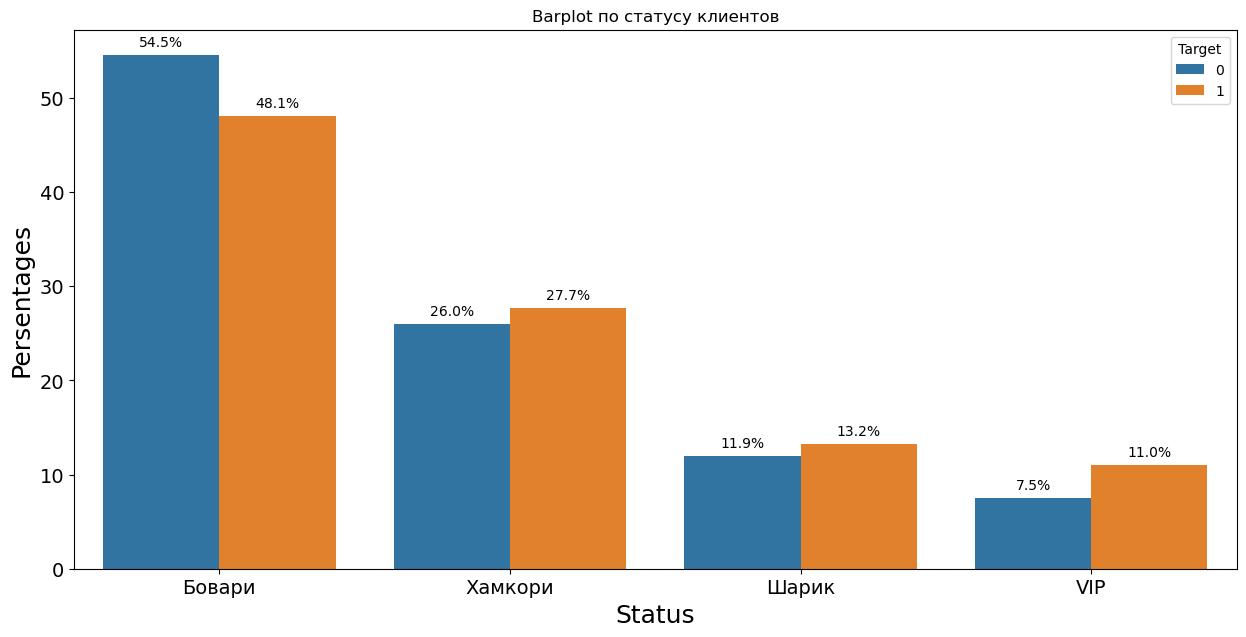

In [393]:
plt.figure(figsize=(15,7))
status_target = df_3.copy()
status_target['Target'] = df_3['Target'].astype(str) 
status_target = (status_target.groupby(['Target'])['Уровень клиента']
                 .value_counts(normalize=True)
                 .rename('persentages')
                 .mul(100)
                 .reset_index()
                 .sort_values('Уровень клиента'))

desired_order = ['Бовари', 'Хамкори', 'Шарик', 'VIP']  

status_target['Уровень клиента'] = pd.Categorical(status_target['Уровень клиента'], categories=desired_order, ordered=True)

ax = sns.barplot(x='Уровень клиента', y='persentages', hue='Target', data=status_target)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Barplot по статусу клиентов')
plt.xlabel('Status',fontsize=18)
plt.ylabel('Persentages', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

### Chi square test

In [394]:
contingency_table = pd.crosstab(df_3['Уровень клиента'], df_3['Target'])
print(contingency_table)

Target              0      1
Уровень клиента             
VIP               637   7447
Бовари           4628  32626
Хамкори          2209  18795
Шарик            1014   8976


In [395]:
chi2, p, dof, expected = sc.chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, P-value: {p}')

Chi2: 167.09058495843564, P-value: 5.4042166872471844e-36


## Hypothesis №4

Уровень образования (Educ) влияет на количество просрочек, чем вышк уровень образования, тем больще Валовый доход и тем меньше кол-во просрочек

In [396]:
df_3['Educ'].unique()

array(['Миёна', 'Миёнаи махсус', 'Оли', 'Олии нопурра', 'Миёнаи нопурра',
       'Аспирантура'], dtype=object)

### Boxplot полу и уровнью образования

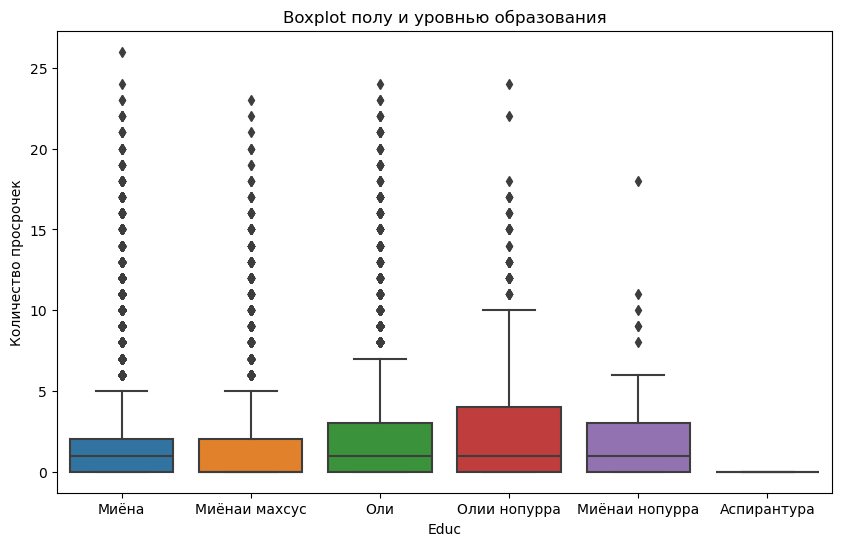

In [397]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Educ', y='Количество просрочек', data=df_3)
plt.title('Boxplot полу и уровнью образования')
plt.show()

### Displot по уровню образования и дохода

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-1.0416875, 0.5, 'Density')

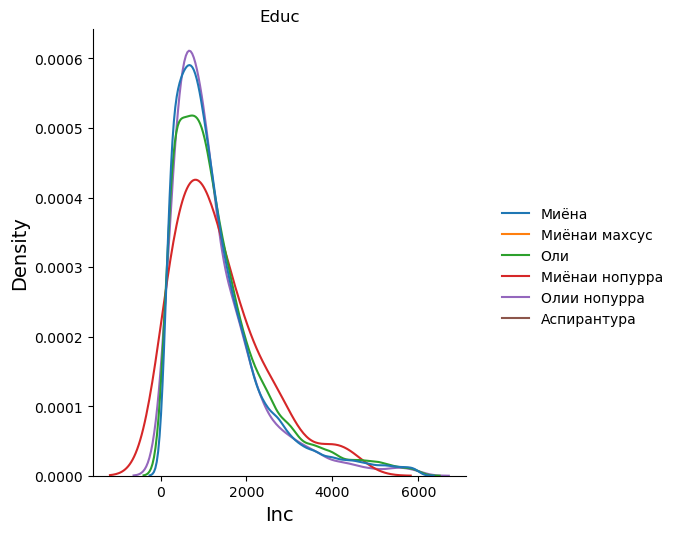

In [398]:
# Миёна', 'Миёнаи махсус', 'Оли', 'Олии нопурра', 'Миёнаи нопурра',
       # 'Аспирантура
sns.displot(
    {
        'Миёна':df_3_1[df_3_1['Educ']=='Миёна'].Income,
        'Миёнаи махсус':df_3_1[df_3_1['Educ']==''].Income,
        'Оли':df_3_1[df_3_1['Educ']=='Оли'].Income,
        'Миёнаи нопурра':df_3_1[df_3_1['Educ']=='Миёнаи нопурра'].Income,
        'Олии нопурра':df_3_1[df_3_1['Educ']=='Олии нопурра'].Income,
        'Аспирантура':df_3_1[df_3_1['Educ']==''].Income

    },
    kind='kde',
    common_norm = False
)
plt.title('Educ')
plt.xlabel('Inc', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

In [399]:
educ_target = df_3.copy()
educ_target['Target'] = df_3['Target'].astype(str) 
educ_target = (educ_target.groupby(['Target'])['Educ']
                 .value_counts(normalize=True)
                 .rename('persentages')
                 .mul(100)
                 .reset_index()
                 .sort_values('Educ'))

desired_order = ['Миёнаи нопурра', 'Миёна', 'Миёнаи махсус', 'Олии нопурра', 'Оли', 'Аспирантура']  

educ_target['Educ'] = pd.Categorical(educ_target['Educ'], categories=desired_order, ordered=True)

### Barplot по образованию клиентов

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

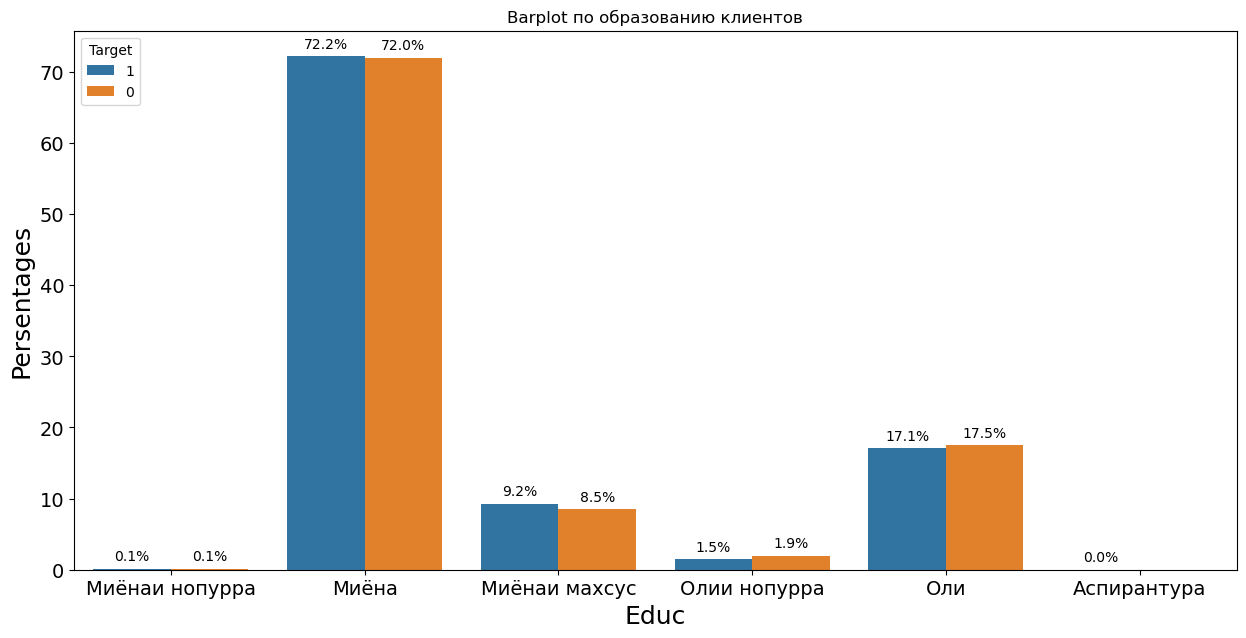

In [400]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='Educ', y='persentages', hue='Target', data=educ_target, )

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Barplot по образованию клиентов')
plt.xlabel('Educ',fontsize=18)
plt.ylabel('Persentages', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [401]:
contingency_table = pd.crosstab(df_3['Educ'], df_3['Target'])
print(contingency_table)

Target             0      1
Educ                       
Аспирантура        0      2
Миёна           6111  48958
Миёнаи махсус    719   6247
Миёнаи нопурра    10     74
Оли             1485  11568
Олии нопурра     163    995


In [402]:
chi2, p, dof, expected = sc.chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, P-value: {p}')

Chi2: 15.933513743361111, P-value: 0.007036481103826454


Уровень образование не имеет влияния на Зависемую переменную!

## Hypothesis №5

Стаж работы (BusExper) влияет на вероятность просрочек. Между колонками "Busex" (опыт работы) и  "Валовая прибыль"  должна быть корреляция

In [403]:
df_3['BusExper'].describe()

count    76332.000000
mean         8.195446
std          8.120869
min          0.000000
25%          1.000000
50%          5.000000
75%         12.000000
max         50.000000
Name: BusExper, dtype: float64

### Boxplot по опыту Работы

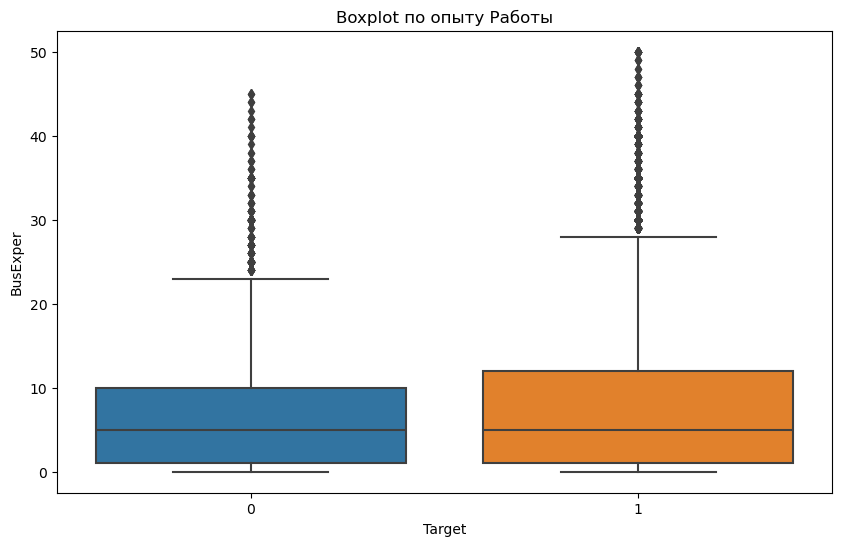

In [404]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='BusExper', data=df_3)
plt.title('Boxplot по опыту Работы')
plt.show()

### Displot по опыту работы

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(11.098357638888887, 0.5, 'Density')

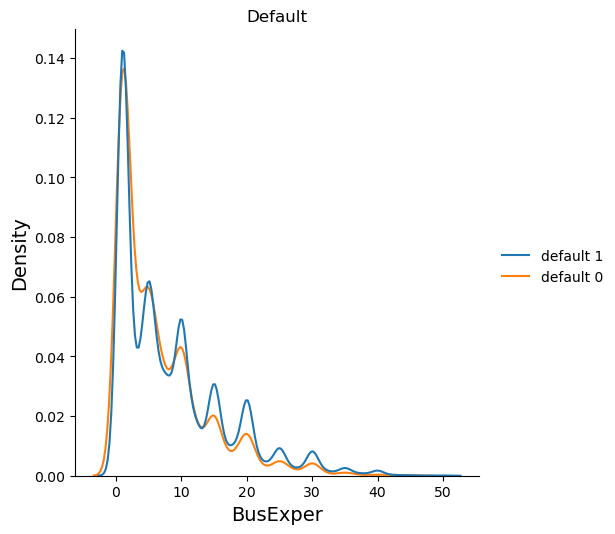

In [405]:
sns.displot(
    {
        'default 1':df_3[df_3['Target']==1].BusExper,
        'default 0':df_3[df_3['Target']==0].BusExper,
    },
    kind='kde',
    common_norm = False
)
plt.title('Default')
plt.xlabel('BusExper', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

In [406]:
df_3.groupby('Target')['BusExper'].median()

Target
0    5.0
1    5.0
Name: BusExper, dtype: float64

In [407]:
df_3.groupby('Target')['BusExper'].mean()

Target
0    6.691909
1    8.383554
Name: BusExper, dtype: float64

In [408]:
df_3.groupby('Target')['BusExper'].apply(lambda x: x.value_counts().index[0]).reset_index()

,Target,BusExper
0,0,1.0
1,1,1.0


### T-test

In [409]:
default_1 = df_3[df_3['Target']==1]['BusExper']
default_0 = df_3[df_3['Target']==0]['BusExper']

In [410]:
t_stat, p_value = sc.ttest_ind(default_1, default_0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 20.608053989005516, P-value: 1.03373954236764e-92


Сравнивая средние значения и провдя ttest можем сказать, что опыт работы определенно влияет на зависемую переменную

## Hypothesis №6

Регион проживания (Region) влияет на риск просрочек.

### Barplot по регионам

In [414]:
region_target = df_3.copy()
region_target['Target'] = df_3['Target'].astype(str) 
region_target = (region_target.groupby(['Target'])['Region']
                 .value_counts(normalize=True)
                 .rename('persentages')
                 .mul(100)
                 .reset_index()
                 .sort_values('Region'))
region_target_1 = region_target.iloc[:int(len(region_target) * 0.5)]
region_target_2 = region_target.iloc[int(len(region_target) * 0.5):]


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

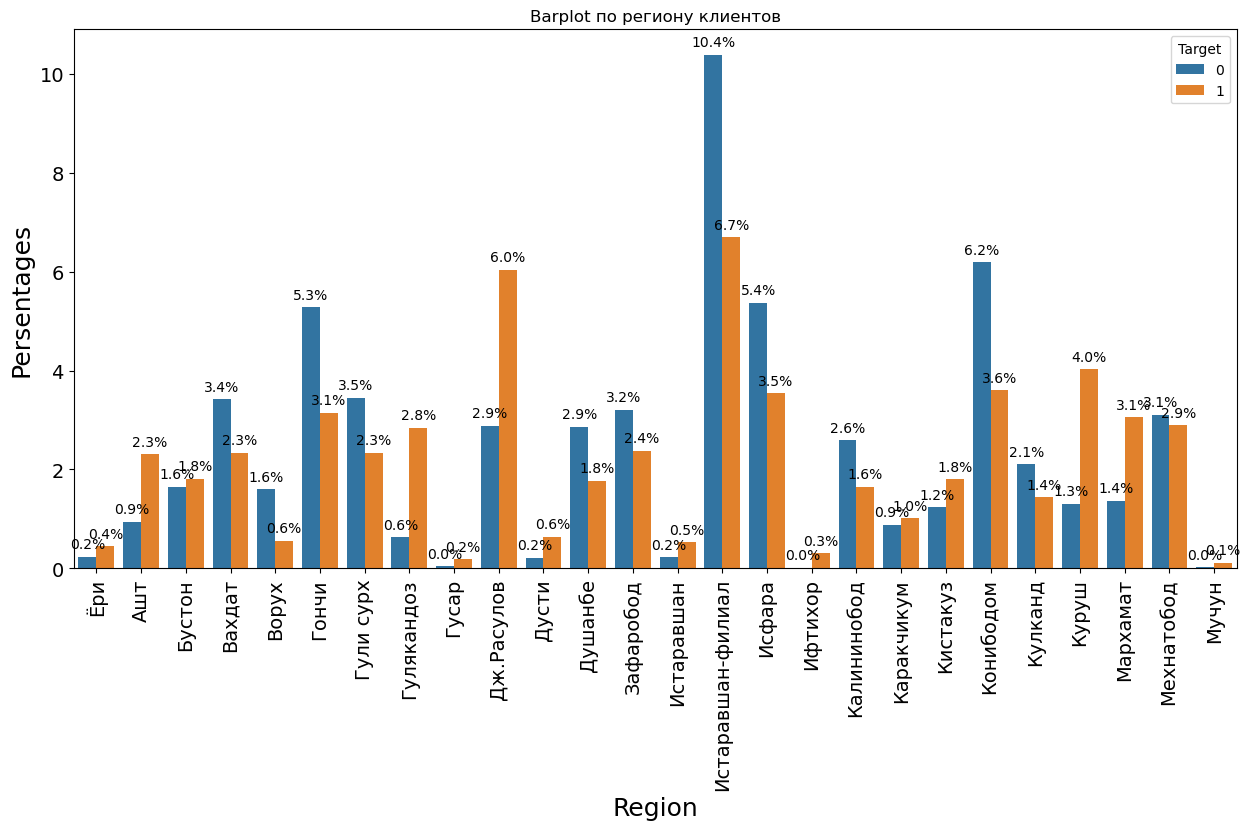

In [415]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='Region', y='persentages', hue='Target', data=region_target_1, )

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Barplot по региону клиентов')
plt.xlabel('Region',fontsize=18)
plt.ylabel('Persentages', fontsize=18)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8')])

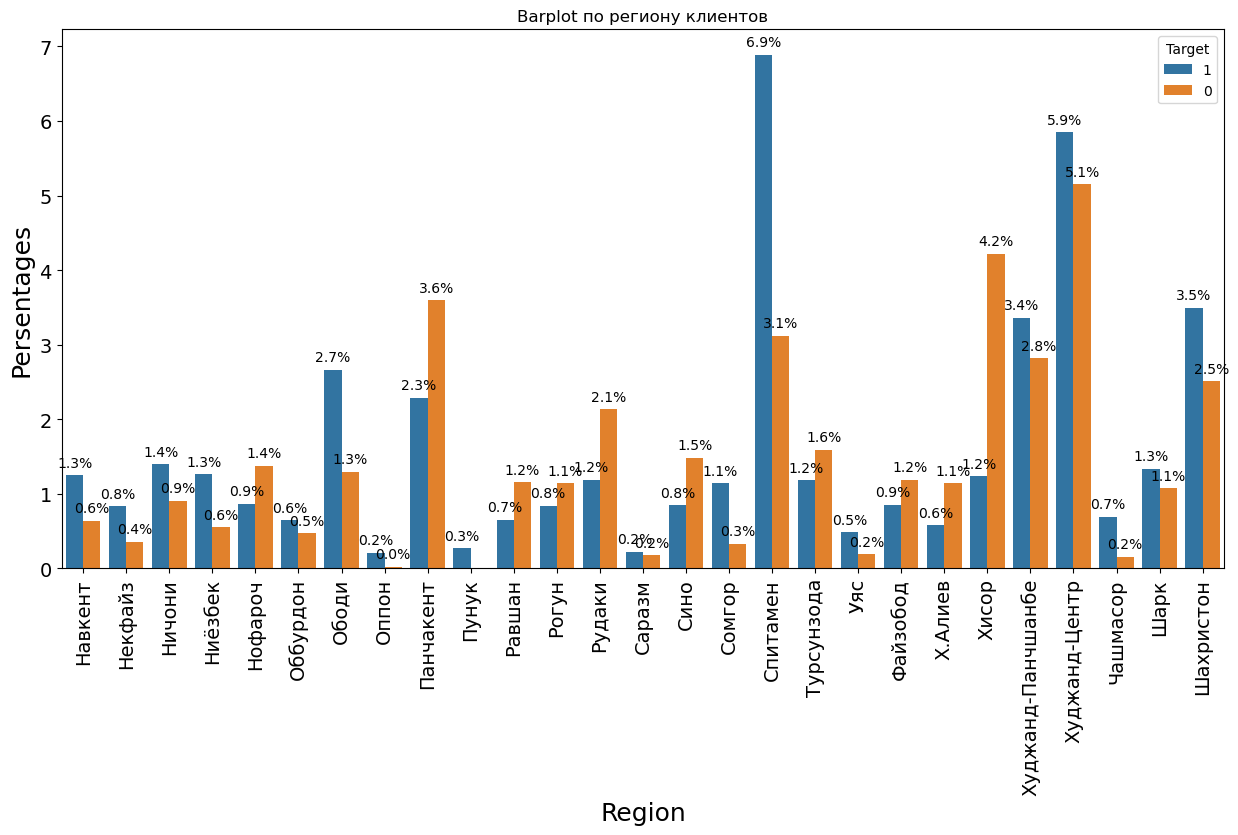

In [416]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='Region', y='persentages', hue='Target', data=region_target_2, )

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Barplot по региону клиентов')
plt.xlabel('Region',fontsize=18)
plt.ylabel('Persentages', fontsize=18)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)

In [417]:
region_target

,Target,Region,persentages
42,0,Ёри,0.235627
98,1,Ёри,0.443665
69,1,Ашт,2.302341
33,0,Ашт,0.942507
19,0,Бустон,1.649387
...,...,...,...
47,0,Чашмасор,0.153157
32,0,Шарк,1.072102
77,1,Шарк,1.338364
16,0,Шахристон,2.509425


In [418]:
region_target_counts = df_3.groupby(['Region', 'Target']).size().reset_index(name='counts')
region_totals = region_target_counts.groupby('Region')['counts'].transform('sum')
region_target_counts['prop'] = region_target_counts['counts'] / region_totals
region_target_counts['prop'] = region_target_counts['prop'].round(2)
region_target_counts = region_target_counts.drop(columns='counts')

region_target_counts

,Region,Target,prop
0,Ёри,0,0.06
1,Ёри,1,0.94
2,Ашт,0,0.05
3,Ашт,1,0.95
4,Бустон,0,0.10
...,...,...,...
100,Чашмасор,1,0.97
101,Шарк,0,0.09
102,Шарк,1,0.91
103,Шахристон,0,0.08


In [419]:
TR1 = region_target_counts[region_target_counts['Target'] == 1].sort_values(by='prop')
TR0 = region_target_counts[region_target_counts['Target'] == 0].sort_values(by='prop')

In [420]:
TR0

,Region,Target,prop
32,Ифтихор,0,0.00
66,Оппон,0,0.01
50,Мучун,0,0.02
14,Гулякандоз,0,0.03
81,Сомгор,0,0.03
16,Гусар,0,0.03
99,Чашмасор,0,0.03
20,Дусти,0,0.04
44,Куруш,0,0.04
87,Уяс,0,0.05


## Hypothesis №7

Семейное положение (Married) связано с количеством просрочек.

In [421]:
df_3['Married'].unique()

array(['Оиладор', 'Чудошуда', 'Беоила', 'Бевамард (бевазан)'],
      dtype=object)

### Boxplot Семейному положению

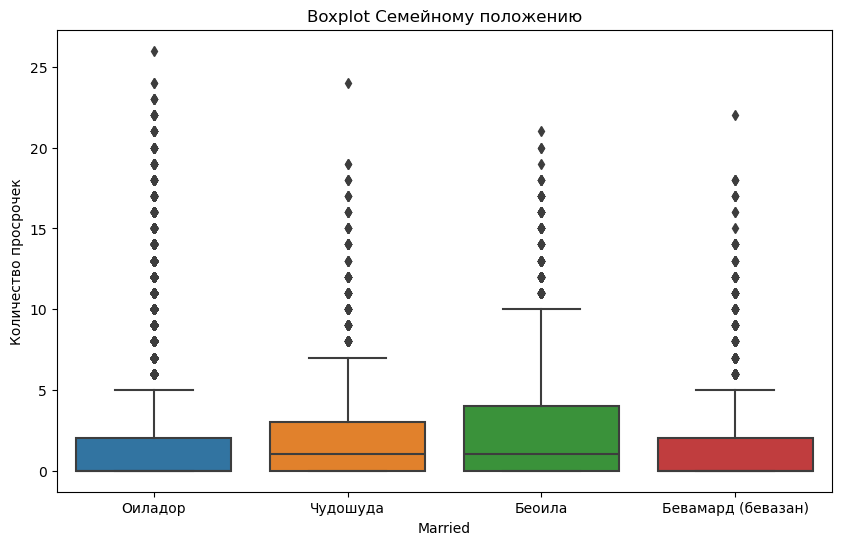

In [422]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Married', y='Количество просрочек', data=df_3)
plt.title('Boxplot Семейному положению') 
plt.show()

### Barplot по Семейному положению клиентов

In [423]:
mar_target = df_3.copy()
mar_target['Target'] = df_3['Target'].astype(str) 
mar_target = (mar_target.groupby(['Target'])['Married']
                 .value_counts(normalize=True)
                 .rename('persentages')
                 .mul(100)
                 .reset_index()
                 .sort_values('Married'))

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

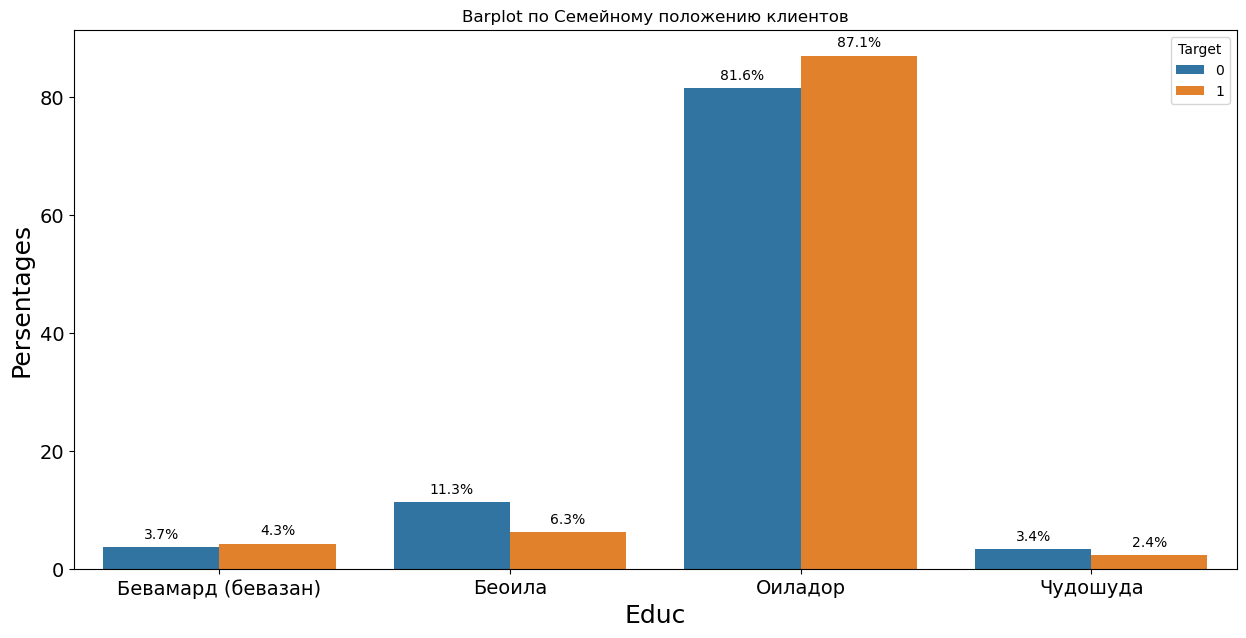

In [424]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='Married', y='persentages', hue='Target', data=mar_target, )

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Barplot по Семейному положению клиентов')
plt.xlabel('Educ',fontsize=18)
plt.ylabel('Persentages', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

### Chi square test и усл-ое ранжирование признака

Среди Женатых(замужных) клиентов виднеется явный перевес 6%

Можно условно ранжировать клиентов по сем. статусу и провести  тест хи квадрат чтобы  явно увидеть влияние на зависемую переменную:

1. Чудошуда
2. Бевамард
3. Беоила
4. Оиладор

In [425]:
contingency_table = pd.crosstab(df_3['Married'], df_3['Target'])
print(contingency_table)

Target                 0      1
Married                        
Бевамард (бевазан)   317   2919
Беоила               960   4252
Оиладор             6926  59069
Чудошуда             285   1604


In [426]:
chi2, p, dof, expected = sc.chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, P-value: {p}')

Chi2: 342.8801276503539, P-value: 5.191569055305271e-74


С результатов теста явно видно влияние признака на зависемую переменную

## Hypothesis №8

Размер семьи (FamilySize) влияет на кредитный риск

In [427]:
df_3.FamilySize.describe()

count    76332.000000
mean         3.217654
std          1.397205
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: FamilySize, dtype: float64

### FS distplot

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(19.973357638888885, 0.5, 'Density')

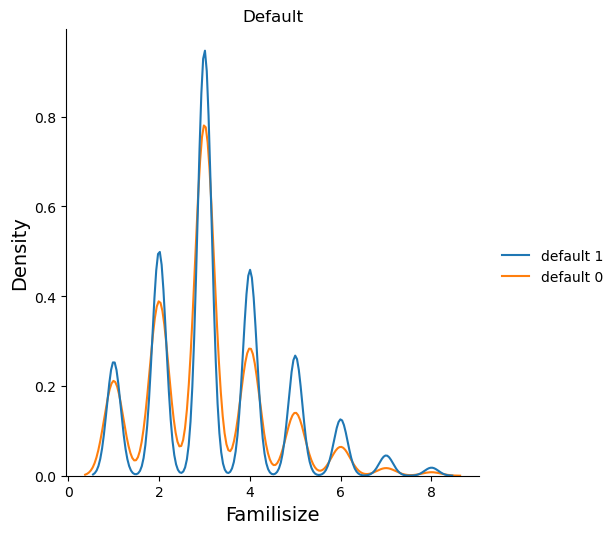

In [428]:
sns.displot(
    {
        'default 1':df_3[df_3['Target']==1].FamilySize,
        'default 0':df_3[df_3['Target']==0].FamilySize,
    },
    kind='kde',
    common_norm = False
)
plt.title('Default')
plt.xlabel('Familisize', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

### FS violinplot

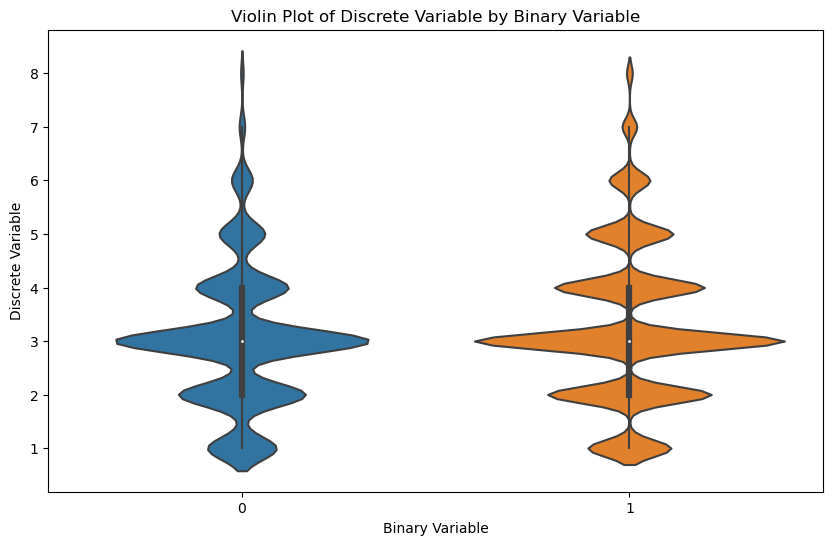

In [429]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Target', y='FamilySize', data=df_3)
plt.title('Violin Plot of Discrete Variable by Binary Variable')
plt.xlabel('Binary Variable')
plt.ylabel('Discrete Variable')
plt.show()


### FS boxplot

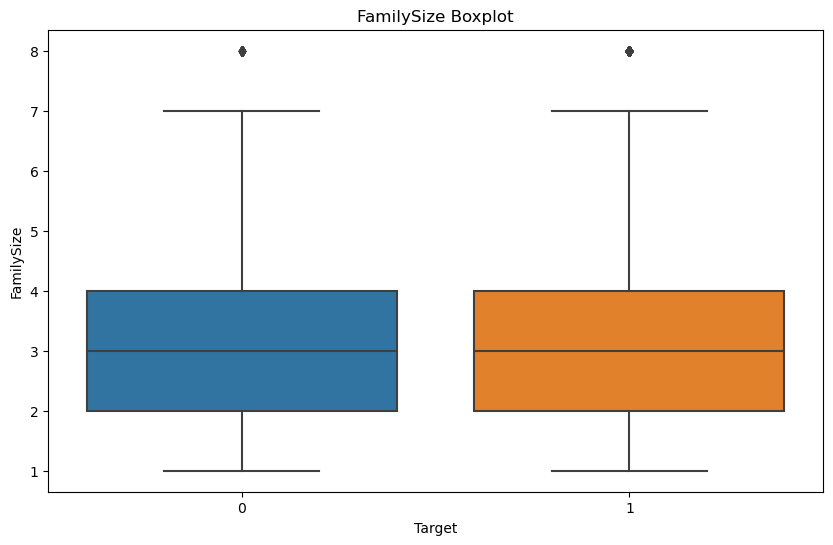

In [430]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='FamilySize', data=df_3)
plt.title('FamilySize Boxplot') 
plt.show()

### FS Barplot

In [431]:
fs_target = df_3.copy()
fs_target['Target'] = df_3['Target'].astype(str) 
fs_target = (fs_target.groupby(['Target'])['FamilySize']
                 .value_counts(normalize=True)
                 .rename('persentages')
                 .mul(100)
                 .reset_index()
                 .sort_values('FamilySize'))

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40'),
  Text(0, 45.0, '45')])

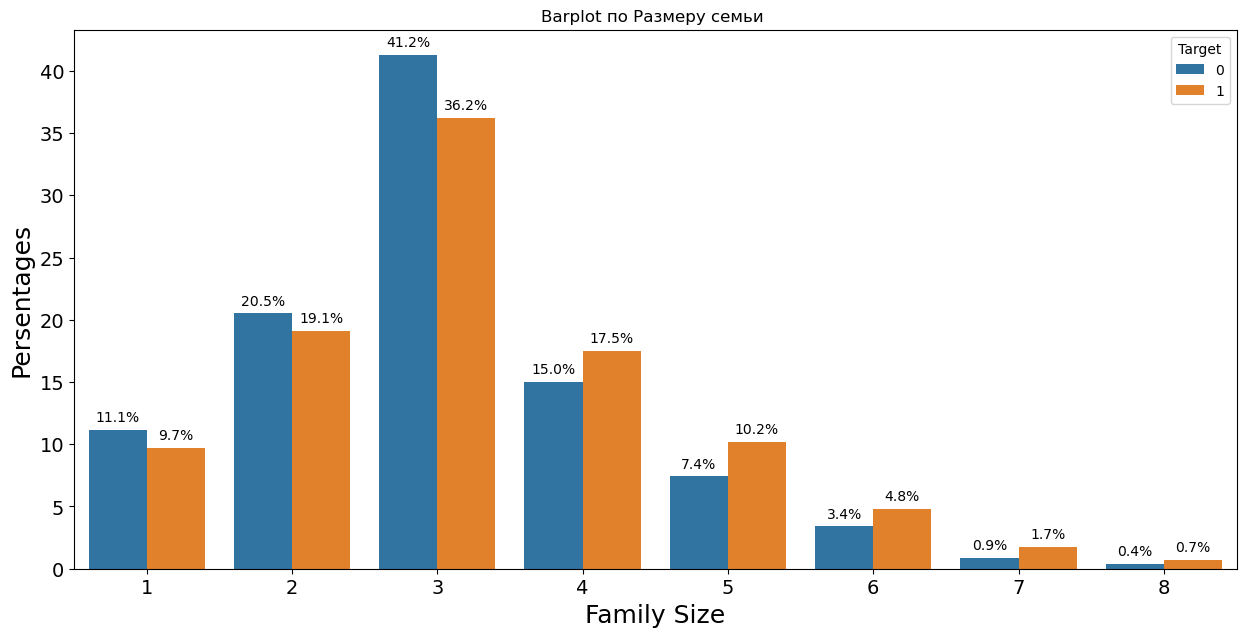

In [432]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='FamilySize', y='persentages', hue='Target', data=fs_target, )

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Barplot по Размеру семьи ')
plt.xlabel('Family Size',fontsize=18)
plt.ylabel('Persentages', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)   

### FS Chi test

In [433]:
contingency_table = pd.crosstab(df_3['FamilySize'], df_3['Target'])
print(contingency_table)

Target         0      1
FamilySize             
1            946   6592
2           1741  12973
3           3501  24568
4           1272  11885
5            629   6933
6            288   3257
7             76   1171
8             35    465


In [434]:
chi2, p, dof, expected = sc.chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, P-value: {p}')

Chi2: 235.91299451377952, P-value: 2.748501949158652e-47


Результаты теста показывают что, размер семьи влияет на вероятность дефолта

## Hypothesis №9

Величина залога (Залог) влияет на риск просрочек

1. группа-поручительство,
2. категория 1 - недвижимость,
3. категория 2-движимое имущество,
4. категория 3-поручительство,
5. категория 4 - без залога

In [435]:
df_3['Залог'].value_counts()

Залог
Группа         25845
Категория 3    20066
Категория 2    18158
Категория 4    11271
Категория 1      992
Name: count, dtype: int64

In [436]:
df_3['Залог'] = df_3['Залог'].replace({'Группа':'Категория 3'}) 

In [437]:
df_3['Залог'].value_counts()

Залог
Категория 3    45911
Категория 2    18158
Категория 4    11271
Категория 1      992
Name: count, dtype: int64

In [438]:
df_3_temp_1 = df_3.copy()
df_3_temp_1 = df_3_temp_1.drop(df_3_temp_1[df_3_temp_1['Капитал']>20000].index)
df_3_temp_1 = df_3_temp_1.drop(df_3_temp_1[df_3_temp_1['Капитал']<0].index)

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(-12.891486111111112, 0.5, 'Density')

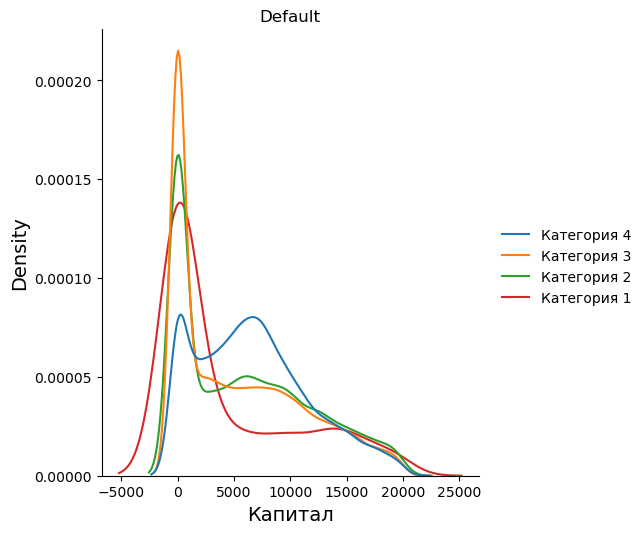

In [439]:
sns.displot(
    {
        'Категория 4':df_3_temp_1[df_3_temp_1['Залог']=='Категория 4']['Капитал'],
        'Категория 3':df_3_temp_1[df_3_temp_1['Залог']=='Категория 3']['Капитал'],
        'Категория 2':df_3_temp_1[df_3_temp_1['Залог']=='Категория 2']['Капитал'],
        'Категория 1':df_3_temp_1[df_3_temp_1['Залог']=='Категория 1']['Капитал'],
    },
    kind='kde',
    common_norm = False
)
plt.title('Default')
plt.xlabel('Капитал', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

In [440]:
df_3.groupby('Залог')['Капитал'].mean()

Залог
Категория 1    63645.199597
Категория 2    13130.812422
Категория 3     8884.694247
Категория 4     9465.108220
Name: Капитал, dtype: float64

### Групировка по залогу и аггрегирование по сумме кредита

In [441]:
df_3.groupby('Залог')['Сумма кредита'].mean()

Залог
Категория 1    26221.667419
Категория 2     7014.317506
Категория 3     4351.278170
Категория 4     2499.280011
Name: Сумма кредита, dtype: float64

In [442]:
def barplotmaker(feature, xrot = 0):
    feature_target = df_3.copy()
    feature_target['Target'] = df_3['Target'].astype(str) 
    feature_target = (feature_target.groupby(['Target'])[feature]
                     .value_counts(normalize=True)
                     .rename('persentages')
                     .mul(100)
                     .reset_index()
                     .sort_values(feature))
    plt.figure(figsize=(15,7))
    ax = sns.barplot(x=feature, y='persentages', hue='Target', data=feature_target)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.title(f'Barplot по признаку - {feature}')
    plt.xlabel(feature,fontsize=18)
    plt.ylabel('Persentages', fontsize=18)
    plt.xticks(fontsize = 14, rotation = xrot)
    plt.yticks(fontsize = 14)   

### Barplot по Залогу

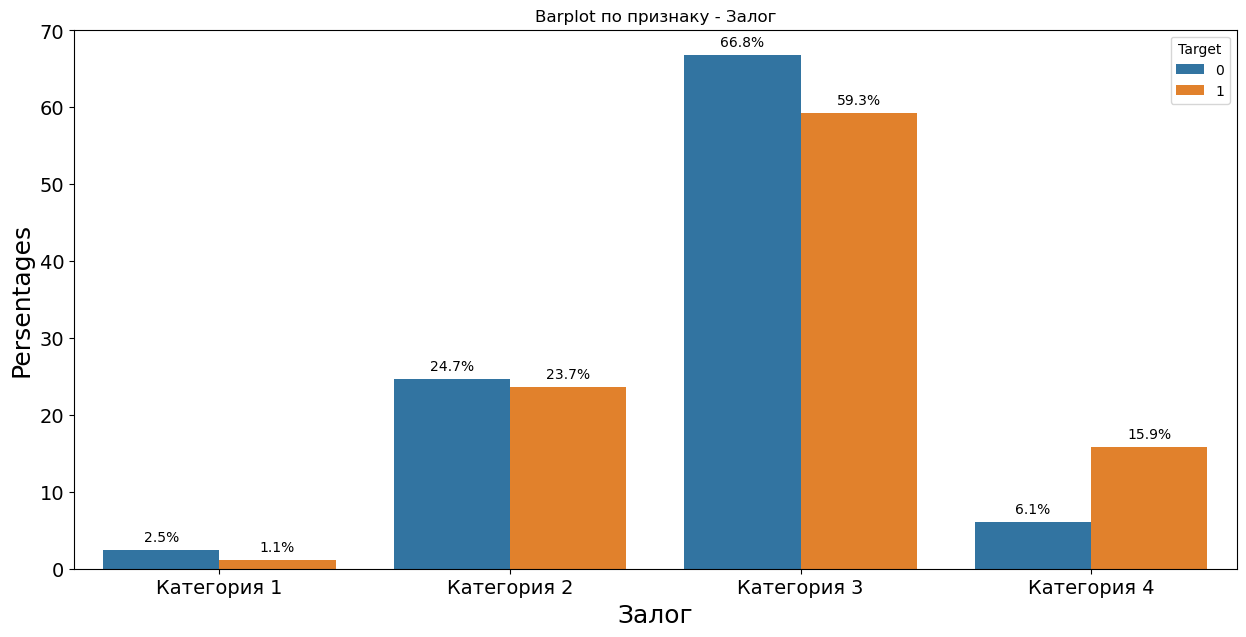

In [443]:
barplotmaker(feature='Залог')

### Ранжировани и корреляция Спирмена

In [444]:
col_dict = ({'Категория 4':1,
             'Категория 3':2,
             'Категория 2':3,
             'Категория 1':4,
})

In [445]:
df_3['rang_col'] = df_3['Залог'].map(col_dict)

In [446]:
from scipy.stats import spearmanr
corr, p_value = spearmanr(df_3['rang_col'], df_3['Target'])

print(f"Коэффициент корреляции Спирмена: {corr}")
print(f"P-значение: {p_value}")


Коэффициент корреляции Спирмена: -0.05988584990597782
P-значение: 1.3558919101923981e-61


## Hypothesis №10

Срок кредита (Срок кредита) влияет на количество просрочек.

In [447]:
df_3['Срок кредита'].describe()

count    76332.000000
mean        13.003983
std          5.475382
min          1.000000
25%         12.000000
50%         12.000000
75%         12.000000
max        120.000000
Name: Срок кредита, dtype: float64

### Distplot по сроку кредитов

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(11.098357638888887, 0.5, 'Density')

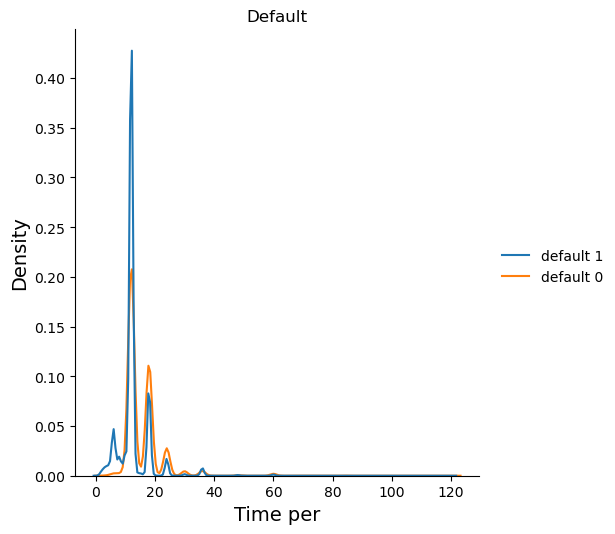

In [448]:
sns.displot(
    {
        'default 1':df_3[df_3['Target']==1]['Срок кредита'],
        'default 0':df_3[df_3['Target']==0]['Срок кредита'],
    },
    kind='kde',
    common_norm = False
)
plt.title('Default')
plt.xlabel('Time per', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

In [449]:
df_3_temp = df_3.copy()
df_3_temp = df_3_temp.drop(df_3_temp[df_3_temp['Срок кредита']<40].index)

C:\Users\Voris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(11.098357638888887, 0.5, 'Density')

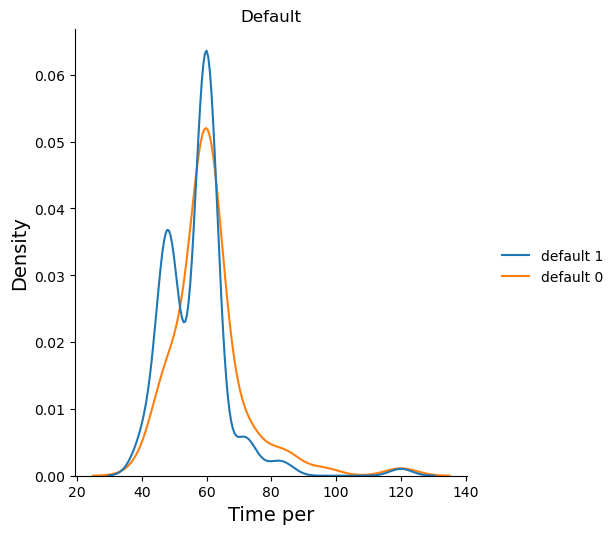

In [450]:
sns.displot(
    {
        'default 1':df_3_temp[df_3_temp['Target']==1]['Срок кредита'],
        'default 0':df_3_temp[df_3_temp['Target']==0]['Срок кредита'],
    },
    kind='kde',
    common_norm = False
)
plt.title('Default')
plt.xlabel('Time per', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

### Сравнение средних и t-test

In [451]:
df_3.groupby('Target')['Срок кредита'].mean()

Target
0    15.590598
1    12.680370
Name: Срок кредита, dtype: float64

In [452]:
df_3.groupby('Target')['Срок кредита'].median()

Target
0    12.0
1    12.0
Name: Срок кредита, dtype: float64

In [453]:
df_3.groupby('Target')['Срок кредита'].apply(lambda x: x.value_counts().index[0]).reset_index()

,Target,Срок кредита
0,0,12
1,1,12


In [454]:
default_1 = df_3[df_3['Target'] == 0]['Срок кредита']
default_0 = df_3[df_3['Target'] == 1]['Срок кредита']

In [455]:
t_stat, p_value = sc.ttest_ind(default_1, default_0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 39.79289952185926, P-value: 0.0


## Hypothesis №11

Пол заемщика (Gender) влияет на вероятность просрочек.

In [456]:
df_3['Gender'].value_counts()

Gender
0    45696
1    30636
Name: count, dtype: int64

### Сравнение средних и t-test

In [457]:
df_3.groupby('Gender')['Дни просрочки'].mean()

Gender
0    15.887780
1    14.394536
Name: Дни просрочки, dtype: float64

In [458]:
df_3.groupby('Gender')['Дни просрочки'].median()

Gender
0    1.0
1    0.0
Name: Дни просрочки, dtype: float64

In [459]:
df_3.groupby('Gender')['Дни просрочки'].apply(lambda x: x.value_counts().index[0]).reset_index()

,Gender,Дни просрочки
0,0,0
1,1,0


In [460]:
default_1 = df_3[df_3['Gender'] == 0]['Дни просрочки']
default_0 = df_3[df_3['Gender'] == 1]['Дни просрочки']

In [461]:
t_stat, p_value = sc.ttest_ind(default_1, default_0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 4.117700044081578, P-value: 3.831228614627486e-05


### Chi-square test по гендеру

In [462]:
contingency_table = pd.crosstab(df_3['Gender'], df_3['Target'])
print(contingency_table)

Target     0      1
Gender             
0       5307  40389
1       3181  27455


In [463]:
chi2, p, dof, expected = sc.chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, P-value: {p}')

Chi2: 27.972792736360034, P-value: 1.2303318631525756e-07


### Barplot по гендеру

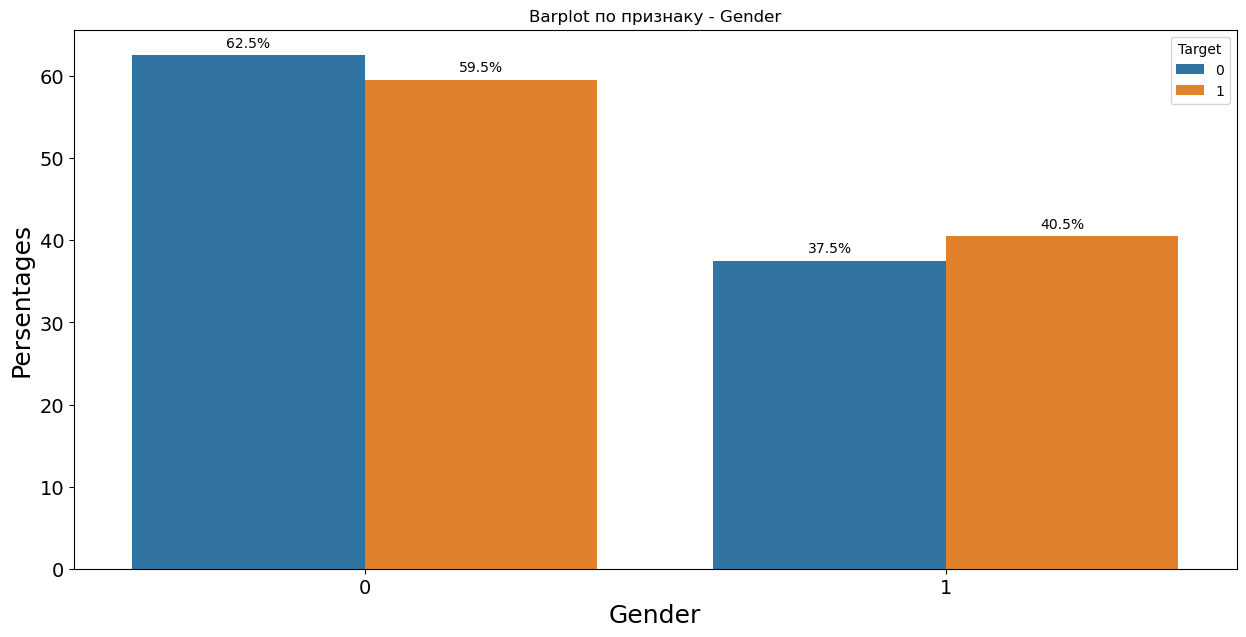

In [464]:
barplotmaker('Gender')

In [465]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76332 entries, 0 to 85421
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birthday                                        76332 non-null  object 
 1   Married                                         76332 non-null  object 
 2   Gender                                          76332 non-null  int64  
 3   Nationality                                     76332 non-null  object 
 4   Educ                                            76332 non-null  object 
 5   FamilySize                                      76332 non-null  int32  
 6   BusExper                                        76332 non-null  float64
 7   Filial                                          76332 non-null  object 
 8   Region                                          76332 non-null  object 
 9   Уровень клиента                             

## Hypothesis №12

Cумма кредита имеет влияние на зависемую переменную

In [466]:
df_3['Сумма кредита'].describe()

count     76332.000000
mean       4995.529901
std        9883.867346
min          20.000000
25%        1500.000000
50%        3000.000000
75%        5000.000000
max      370000.000000
Name: Сумма кредита, dtype: float64

## Boxplot по сумме кредита

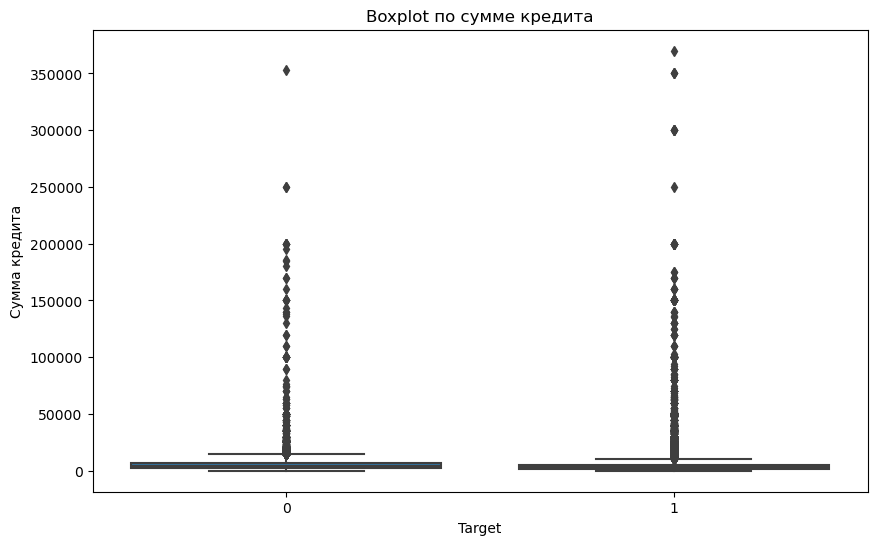

In [467]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Сумма кредита', data=df_3)
plt.title('Boxplot по сумме кредита')
plt.show()

### Сравнение средних и t-test

In [468]:
df_3.groupby('Target')['Сумма кредита'].mean()

Target
0    6623.443062
1    4791.860794
Name: Сумма кредита, dtype: float64

In [469]:
df_3.groupby('Target')['Сумма кредита'].median()

Target
0    4000.0
1    3000.0
Name: Сумма кредита, dtype: float64

In [470]:
df_3.groupby('Target')['Сумма кредита'].apply(lambda x: x.value_counts().index[0]).reset_index()

,Target,Сумма кредита
0,0,5000.0
1,1,5000.0


In [471]:
default_1 = df_3[df_3['Target'] == 0]['Сумма кредита']
default_0 = df_3[df_3['Target'] == 1]['Сумма кредита']

In [472]:
t_stat, p_value = sc.ttest_ind(default_1, default_0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 12.40805829211632, P-value: 4.3906588522294746e-35


In [473]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76332 entries, 0 to 85421
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birthday                                        76332 non-null  object 
 1   Married                                         76332 non-null  object 
 2   Gender                                          76332 non-null  int64  
 3   Nationality                                     76332 non-null  object 
 4   Educ                                            76332 non-null  object 
 5   FamilySize                                      76332 non-null  int32  
 6   BusExper                                        76332 non-null  float64
 7   Filial                                          76332 non-null  object 
 8   Region                                          76332 non-null  object 
 9   Уровень клиента                             

## Hypothesis №13

Типа валюты может влиять на зависемую переменную

In [474]:
df_3['Валюта кредита'].value_counts()

Валюта кредита
Сомони        60960
Доллар США    14657
Рос.рубль       715
Name: count, dtype: int64

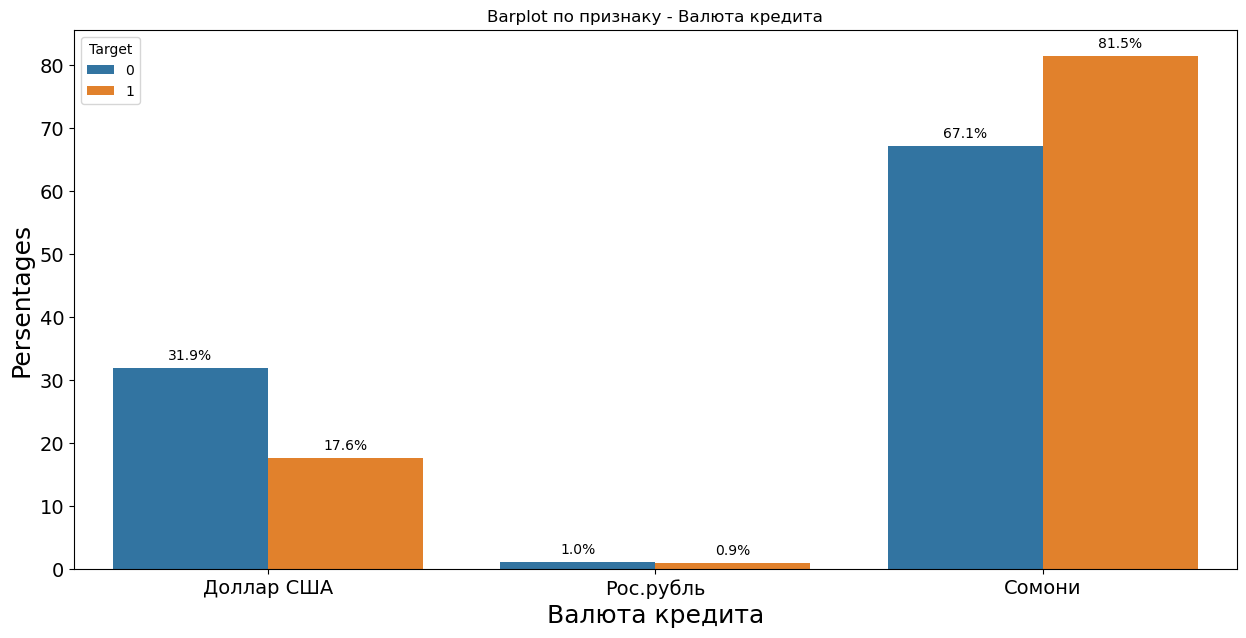

In [475]:
barplotmaker('Валюта кредита')

## Оценка по продуктам

In [476]:
df_3['Продукт'].unique()

array(['Кредит на предпринимательскую деятельность',
       'Потребительский кредит', 'Жилищный кредит',
       'Энергосберегающие технологии'], dtype=object)

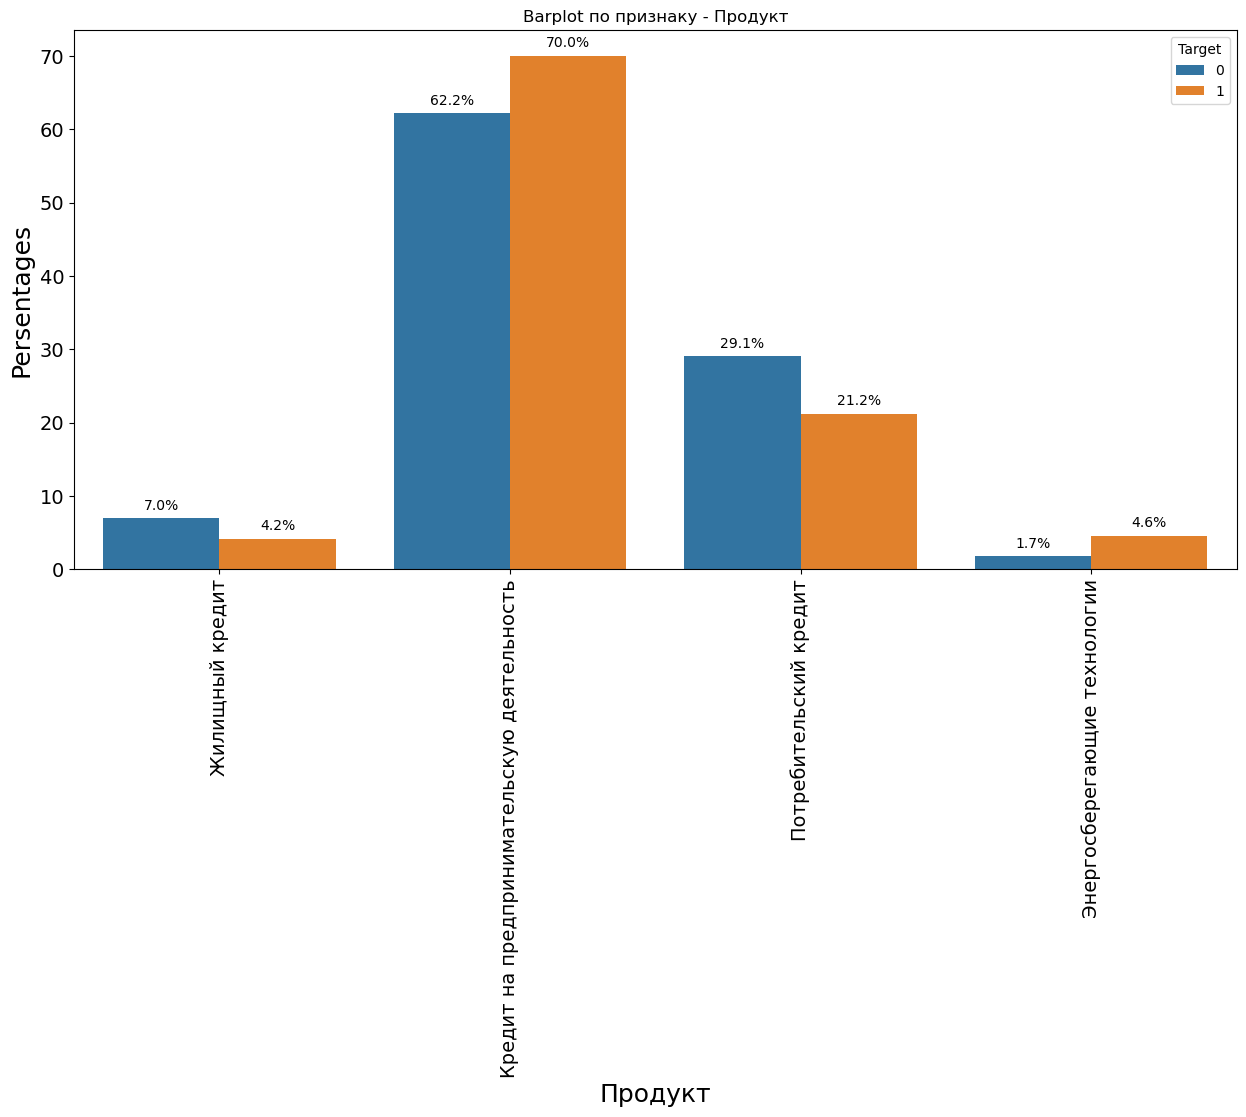

In [477]:
barplotmaker('Продукт',xrot = 90)

In [478]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76332 entries, 0 to 85421
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birthday                                        76332 non-null  object 
 1   Married                                         76332 non-null  object 
 2   Gender                                          76332 non-null  int64  
 3   Nationality                                     76332 non-null  object 
 4   Educ                                            76332 non-null  object 
 5   FamilySize                                      76332 non-null  int32  
 6   BusExper                                        76332 non-null  float64
 7   Filial                                          76332 non-null  object 
 8   Region                                          76332 non-null  object 
 9   Уровень клиента                             

# Modeling

In [479]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [480]:
df_label = df_3[['Age',
                 'Gender',
                 'Educ',
                 'Married',
                 'FamilySize',
                 'BusExper',
                 'Income',
                 'Уровень клиента',
                 'Сумма кредита',
                 'Срок кредита',
                 'Залог',
                 'Region',
                 'Валюта кредита',
                 'Актив',
                 'Target'
]]

In [481]:
df_label = pd.get_dummies(df_label)

In [482]:
X=df_label.drop(['Target'], axis=1)
y=df_label['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y,shuffle=True)

## Baseline logreg

In [549]:
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, classification_report, roc_curve, log_loss

In [550]:
from sklearn.preprocessing import StandardScaler 

In [551]:
from sklearn.neighbors import KNeighborsClassifier

In [577]:
lr = LogisticRegression(class_weight='balanced') 
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
y_score_lr = lr.predict_proba(X_test)[:,1]

In [578]:
print('roc_auc:', roc_auc_score(y_test,y_score_lr))
print('precision score', precision_score(y_test,y_pred_lr))
print('recall score', recall_score(y_test,y_pred_lr))
print('f1 score', f1_score(y_test,y_pred_lr))
print('Logloss', log_loss(y_test,y_pred_lr))

roc_auc: 0.7464596207226359
precision score 0.9457158805470276
recall score 0.6659133339884052
f1 score 0.7815256875973015
Logloss 11.927458750337543


In [579]:
metrics = pd.DataFrame(
    index = ['roc_auc','precision','recall', 'f1', 'Logloss'])
metrics['Baseline_LR'] = [roc_auc_score(y_test,y_score_lr),
                          precision_score(y_test,y_pred_lr),
                          recall_score(y_test,y_pred_lr),
                          f1_score(y_test,y_pred_lr),
                          log_loss(y_test,y_pred_lr)]

In [580]:
metrics

,Baseline_LR
roc_auc,0.746460
precision,0.945716
recall,0.665913
f1,0.781526
Logloss,11.927459


In [581]:
Dtree = DecisionTreeClassifier(class_weight='balanced',max_depth=8) 
Dtree.fit(X_train,y_train)
y_pred_dtr = Dtree.predict(X_test)
y_score_dtr = Dtree.predict_proba(X_test)[:,1]

In [582]:
metrics['Baseline_DTree'] = [roc_auc_score(y_test,y_score_dtr),
                          precision_score(y_test,y_pred_dtr),
                          recall_score(y_test,y_pred_dtr),
                          f1_score(y_test,y_pred_dtr),
                          log_loss(y_test,y_pred_dtr)]
metrics

,Baseline_LR,Baseline_DTree
roc_auc,0.746460,0.710958
precision,0.945716,0.942873
recall,0.665913,0.591137
f1,0.781526,0.726680
Logloss,11.927459,14.245900


In [583]:
sc = StandardScaler() 
X_train = sc.fit_transform (X_train) 
X_test = sc.transform (X_test)

In [584]:
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_score_knn = knn.predict_proba(X_test)[:,1]

In [585]:
metrics['Baseline_KNN'] = [roc_auc_score(y_test,y_score_knn),
                          precision_score(y_test,y_pred_knn),
                          recall_score(y_test,y_pred_knn),
                          f1_score(y_test,y_pred_knn),
                          log_loss(y_test,y_pred_knn)]
metrics

,Baseline_LR,Baseline_DTree,Baseline_KNN
roc_auc,0.746460,0.710958,0.716719
precision,0.945716,0.942873,0.888884
recall,0.665913,0.591137,0.999853
f1,0.781526,0.726680,0.941108
Logloss,11.927459,14.245900,4.008873


#### SVC

In [586]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(probability=True, kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_score_svc = svc.predict_proba(X_test)[:,1]

In [ ]:
metrics['Baseline_SVC'] = [roc_auc_score(y_test,y_score_svc),
                          precision_score(y_test,y_pred_svc),
                          recall_score(y_test,y_pred_svc),
                          f1_score(y_test,y_pred_svc),
                          log_loss(y_test,y_pred_svc)]
metrics

In [1]:
1+1

2

In [ ]:
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

In [ ]:
y_pred_logreg = log_regression.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_logreg)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
cnf_matrix

In [ ]:
from sklearn.metrics import mean_squared_error
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
mse_logreg

In [ ]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show    ()

#### Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=5)

In [ ]:
model_tree.fit(X_train, y_train)

In [ ]:
y_pred_DTree = model_tree.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_DTree)
cnf_matrix

In [ ]:
mseDTree = mean_squared_error(y_test, y_pred_logreg)
mseDTree